In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
## read the cleaned dataset
df = pd.read_csv('cleaning.csv', index_col = 0)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,0,2143,1,0,cellular,5,may,261,1,-1,0,no
1,44,technician,single,secondary,0,29,1,0,cellular,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,0,2,1,1,cellular,5,may,76,1,-1,0,no
3,47,blue-collar,married,secondary,0,1506,1,0,cellular,5,may,92,1,-1,0,no
4,33,management,single,tertiary,0,1,0,0,cellular,5,may,198,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,yes
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,yes
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,yes
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,no


In [56]:
df['y'] = df.y.eq('yes').mul(1)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,0,2143,1,0,cellular,5,may,261,1,-1,0,0
1,44,technician,single,secondary,0,29,1,0,cellular,5,may,151,1,-1,0,0
2,33,entrepreneur,married,secondary,0,2,1,1,cellular,5,may,76,1,-1,0,0
3,47,blue-collar,married,secondary,0,1506,1,0,cellular,5,may,92,1,-1,0,0
4,33,management,single,tertiary,0,1,0,0,cellular,5,may,198,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,1
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,0


### a) Distribution of education with the client subscribed a term deposit(y = yes)

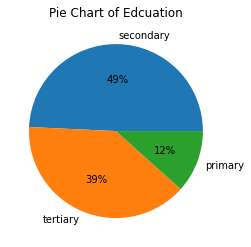

In [31]:
education_counts = (df[df['y'] == 'yes']['education']).value_counts()
plt.pie(education_counts.values, labels=education_counts.index, autopct='%.0f%%')
plt.title('Pie Chart of Edcuation')
plt.show()

#### Secondary education has the most customers, bank can focus on them to enhance the efficiency.

### b) Distribution of housing and loan with y = yes

<AxesSubplot:title={'center':'Distribution of housing'}, xlabel='housing', ylabel='Percent'>

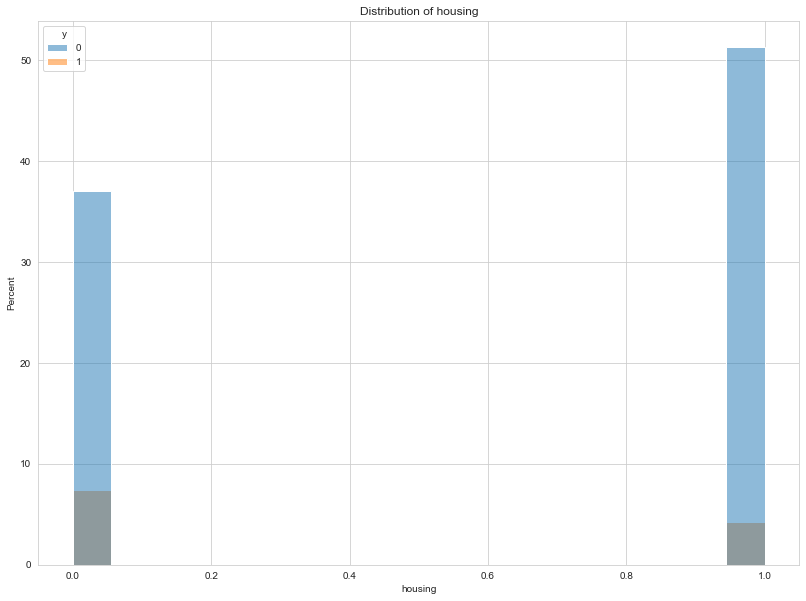

In [79]:
fig = plt.figure(figsize=(30,10))

fig.add_subplot(1,2,1)
plt.title("Distribution of housing")
sns.set_style("whitegrid")
sns.histplot(x= "housing", hue="y", stat='percent', data=df)

<AxesSubplot:title={'center':'Distribution of loan'}, xlabel='loan', ylabel='Percent'>

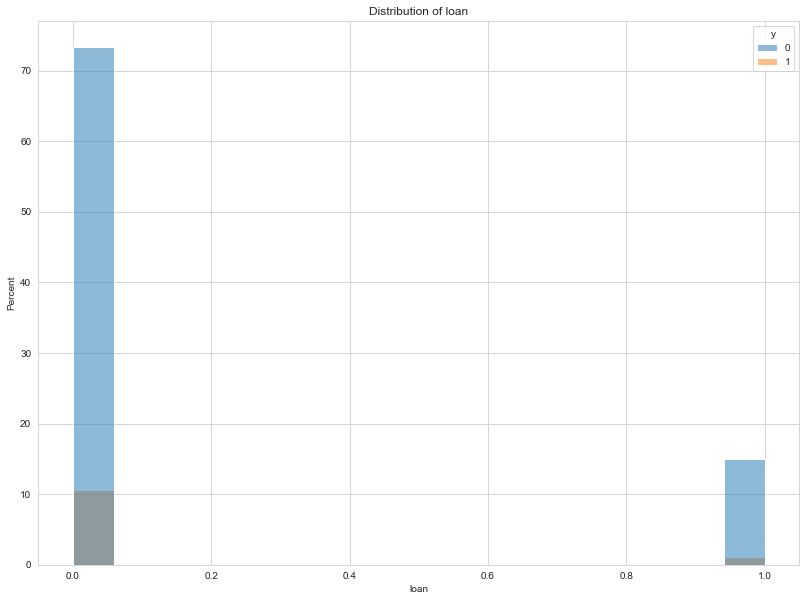

In [87]:
fig = plt.figure(figsize=(30,10))

fig.add_subplot(1,2,1)
plt.title("Distribution of loan")
sns.set_style("whitegrid")
sns.histplot(x= "loan", hue="y", stat='percent', data=df)

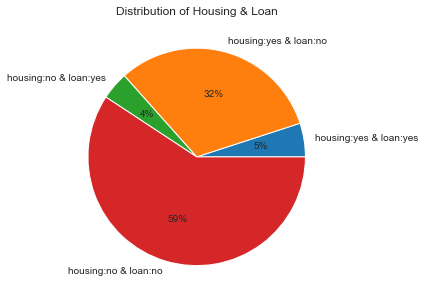

In [85]:
a = ((df['housing'] == 1) & (df['loan'] == 1) & (df['y'] == 1)).value_counts()[True]
b = ((df['housing'] == 1) & (df['loan'] == 0) & (df['y'] == 1)).value_counts()[True]
c = ((df['housing'] == 0) & (df['loan'] == 1) & (df['y'] == 1)).value_counts()[True]
d = ((df['housing'] == 0) & (df['loan'] == 0) & (df['y'] == 1)).value_counts()[True]

fig = plt.figure(figsize=(30,5))
labels = ['housing:yes & loan:yes', 'housing:yes & loan:no', 'housing:no & loan:yes', 'housing:no & loan:no']
plt.pie([a, b, c, d], labels=labels, autopct='%.0f%%')
plt.title('Distribution of Housing & Loan')
plt.show()

#### The bank should target the customer without loan.

### c) Correlation between Features

<AxesSubplot:>

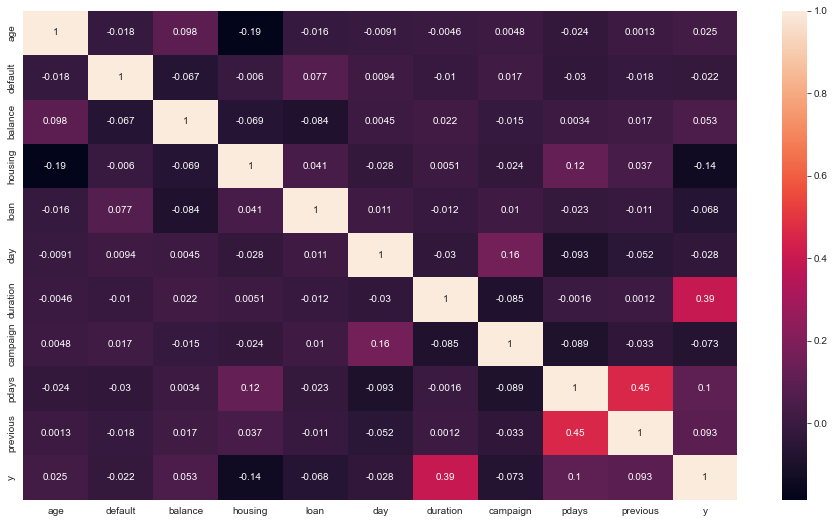

In [57]:
## check correlation
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(), \
            annot=True)

### d) Distribution of Age

<AxesSubplot:title={'center':'Distribution of Age'}, xlabel='age', ylabel='Count'>

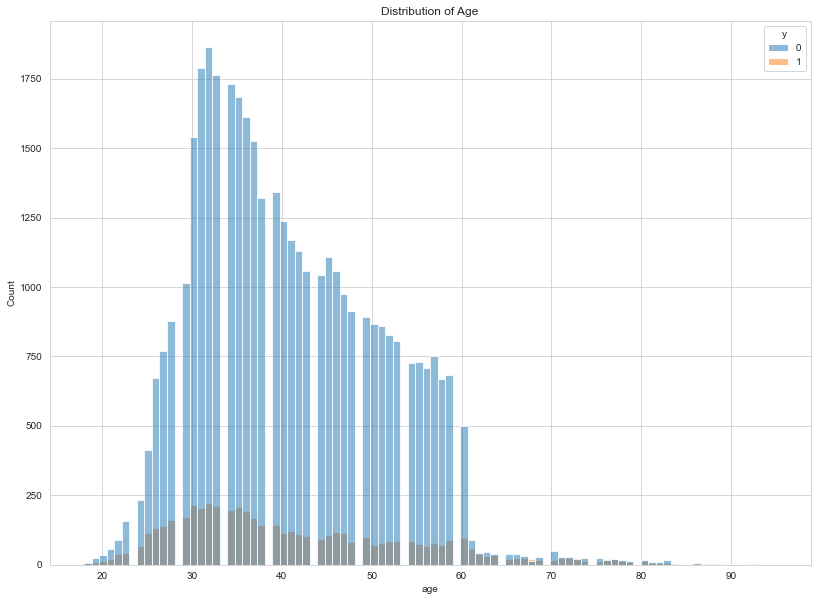

In [61]:
fig = plt.figure(figsize=(30,10))

fig.add_subplot(1,2,1)
plt.title("Distribution of Age")
sns.set_style("whitegrid")
sns.histplot(x="age", hue="y", data=df)

#### Target customer age is about 30-40 years old.

In [63]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,0,2143,1,0,cellular,5,may,261,1,-1,0,0
1,44,technician,single,secondary,0,29,1,0,cellular,5,may,151,1,-1,0,0
2,33,entrepreneur,married,secondary,0,2,1,1,cellular,5,may,76,1,-1,0,0
3,47,blue-collar,married,secondary,0,1506,1,0,cellular,5,may,92,1,-1,0,0
4,33,management,single,tertiary,0,1,0,0,cellular,5,may,198,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,1
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,0


### e) Distribution of Loans(housing, loan)

<AxesSubplot:title={'center':'Distribution of Loan'}, xlabel='job', ylabel='Percent'>

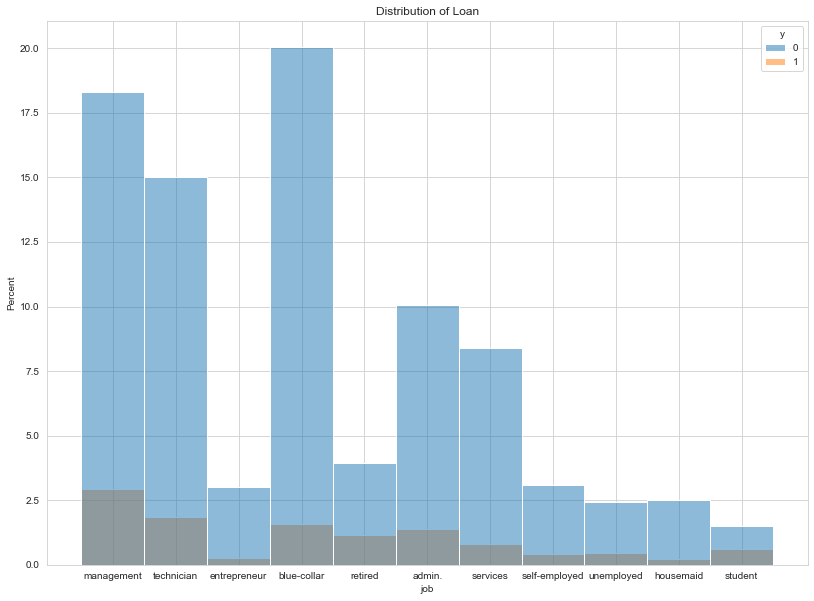

In [75]:
fig = plt.figure(figsize=(30,10))

fig.add_subplot(1,2,1)
plt.title("Distribution of Loan")
sns.set_style("whitegrid")
sns.histplot(x= "job", hue="y", stat='percent', data=df)

### d) Distribution of Contact

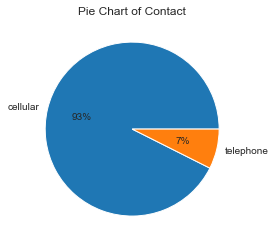

In [89]:
education_counts = (df[df['y'] == 1]['contact']).value_counts()
plt.pie(education_counts.values, labels=education_counts.index, autopct='%.0f%%')
plt.title('Pie Chart of Contact')
plt.show()

#### The bank can focuse on the customer who using cellular contact.

### e) Distribution of Month

<AxesSubplot:title={'center':'Distribution of Age'}, xlabel='month', ylabel='Percent'>

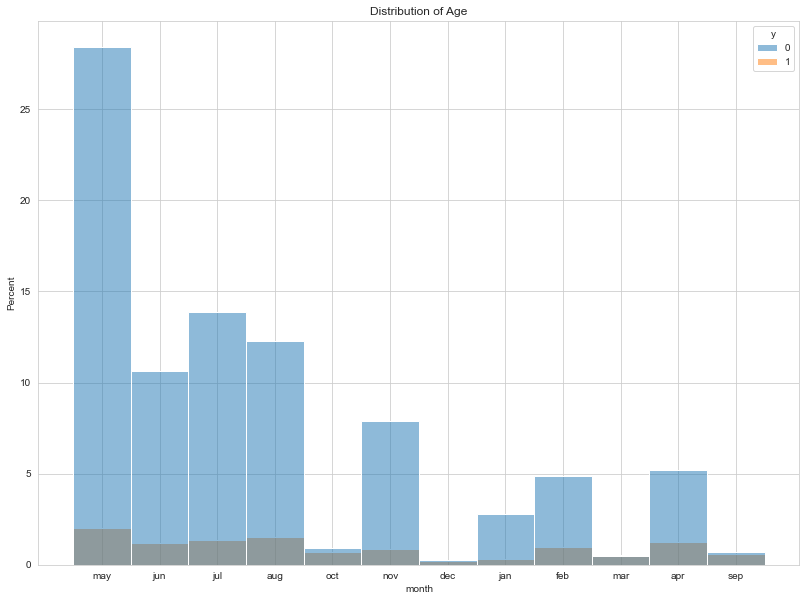

In [96]:
fig = plt.figure(figsize=(30,10))

fig.add_subplot(1,2,1)
plt.title("Distribution of Age")
sns.set_style("whitegrid")
sns.histplot(x="month", hue="y", stat='percent',data=df)

#### December, March, Spetember and January are not ideal time to attract the customers.

### f) Distribution of Duration

<AxesSubplot:title={'center':'Distribution of Age'}, xlabel='duration', ylabel='Percent'>

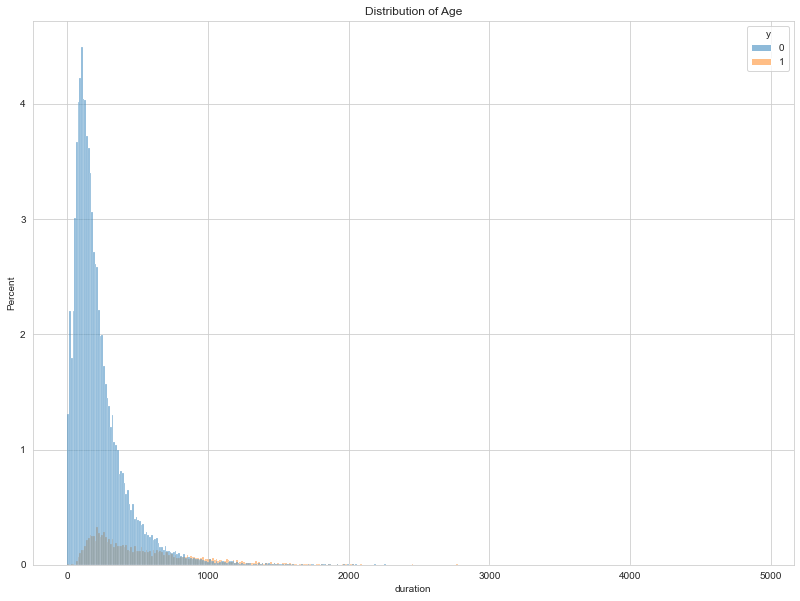

In [98]:
fig = plt.figure(figsize=(30,10))

fig.add_subplot(1,2,1)
plt.title("Distribution of Age")
sns.set_style("whitegrid")
sns.histplot(x="duration", hue="y", stat='percent',data=df)

### g) Distribution of Pdays

<AxesSubplot:title={'center':'Distribution of Pdays'}, xlabel='pdays', ylabel='Percent'>

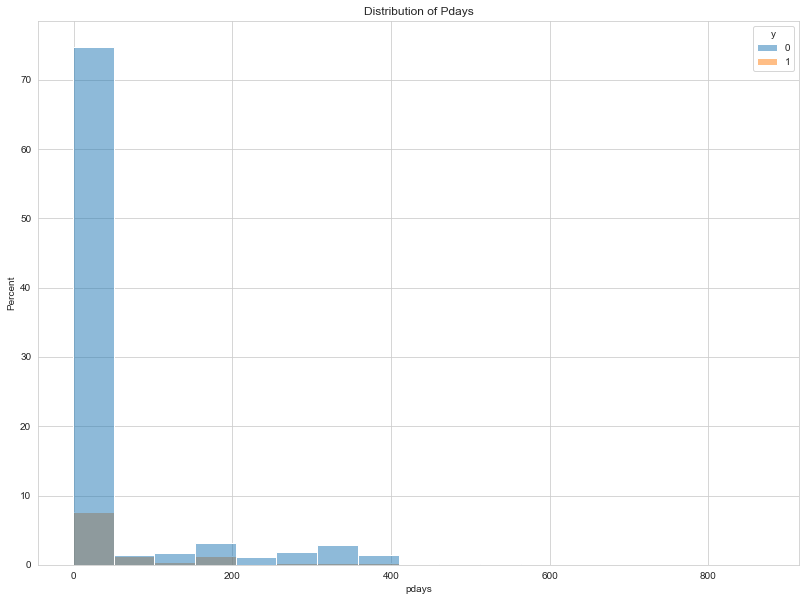

In [101]:
fig = plt.figure(figsize=(30,10))

fig.add_subplot(1,2,1)
plt.title("Distribution of Pdays")
sns.set_style("whitegrid")
sns.histplot(x="pdays", hue="y", stat='percent',data=df)

### h) Distribution of Marital

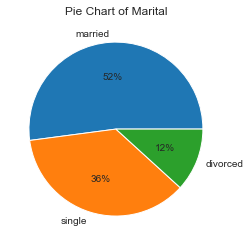

In [105]:
counts = (df[df['y'] == 1]['marital']).value_counts()
plt.pie(counts.values, labels=counts.index, autopct='%.0f%%')
plt.title('Pie Chart of Marital')
plt.show()

Recommendations:
1. The bank can focus on the customers with secondary education.
2. The bank can focus on the customers without housing or personal loans.
3. The customers with age between 30-40 are more likely to subscribe.
4. December, March, Spetember and January are not ideal time to attract the customers.
5. The bank can focus on the customers who using cellular contact.
6. The bank can focus on the customers who are contacted in a few days.